In [154]:
import pandas as pd
import datetime

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error

# Q1. Downloading the data

In [156]:
jan_df = pd.read_parquet('fhv_tripdata_2021-01.parquet')
feb_df = pd.read_parquet('fhv_tripdata_2021-02.parquet')

In [157]:
jan_df.shape

(1154112, 7)

There is **1154112** records in january data.

# Q2. Computing duration

In [158]:
jan_df['duration'] = jan_df.dropOff_datetime - jan_df.pickup_datetime
jan_df['duration'] = jan_df.duration.apply(lambda x: x.seconds/60)

In [159]:
jan_df.duration.mean()

18.610744306736674

The average trip duration in January is **18.61**

# Data preparation

<AxesSubplot:>

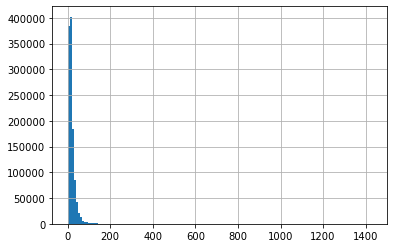

In [160]:
jan_df.duration.hist(bins=150)

In [161]:
jan_df = jan_df[(jan_df.duration >= 1) & (jan_df.duration <= 60)]

In [162]:
jan_df.shape

(1109853, 8)

In [163]:
1154112 - 1109853

44259

We dropped **44259** rows.

# Q3 Missing values

In [164]:
jan_df.PUlocationID[jan_df['PUlocationID'].isna()] = -1

In [165]:
jan_df.DOlocationID.loc[jan_df['DOlocationID'].isna()] = -1

In [166]:
(jan_df.PUlocationID == -1).sum() / jan_df.PUlocationID.shape[0]

0.835275482428754

The fraction of missing values for the pickup location ID is **83%**

# Q4 One-hot encoding

In [167]:
features = jan_df[['PUlocationID', 'DOlocationID']].to_dict(orient='records')

In [168]:
features

[{'PUlocationID': -1.0, 'DOlocationID': -1.0},
 {'PUlocationID': -1.0, 'DOlocationID': -1.0},
 {'PUlocationID': -1.0, 'DOlocationID': 72.0},
 {'PUlocationID': -1.0, 'DOlocationID': 61.0},
 {'PUlocationID': -1.0, 'DOlocationID': 71.0},
 {'PUlocationID': -1.0, 'DOlocationID': 91.0},
 {'PUlocationID': -1.0, 'DOlocationID': 39.0},
 {'PUlocationID': -1.0, 'DOlocationID': 37.0},
 {'PUlocationID': -1.0, 'DOlocationID': 39.0},
 {'PUlocationID': -1.0, 'DOlocationID': 72.0},
 {'PUlocationID': -1.0, 'DOlocationID': 72.0},
 {'PUlocationID': -1.0, 'DOlocationID': 89.0},
 {'PUlocationID': -1.0, 'DOlocationID': 177.0},
 {'PUlocationID': -1.0, 'DOlocationID': 225.0},
 {'PUlocationID': -1.0, 'DOlocationID': 63.0},
 {'PUlocationID': -1.0, 'DOlocationID': 67.0},
 {'PUlocationID': -1.0, 'DOlocationID': 22.0},
 {'PUlocationID': -1.0, 'DOlocationID': 61.0},
 {'PUlocationID': -1.0, 'DOlocationID': 14.0},
 {'PUlocationID': -1.0, 'DOlocationID': 14.0},
 {'PUlocationID': -1.0, 'DOlocationID': 188.0},
 {'PUlocat

In [169]:
dv = DictVectorizer()

X_train = dv.fit_transform(features)

In [170]:
X_train

<1109853x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2219706 stored elements in Compressed Sparse Row format>

Number of columns : **2**

In [171]:
y_train = jan_df.duration.values

# Q5 Training a model

In [172]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [173]:
y_pred = lr.predict(X_train)

In [174]:
mean_squared_error(y_train, y_pred, squared=False)

11.415550966867276

RMSE on train is **11.41**

# Q6 Evaluating the model

In [175]:
feb_df['duration'] = feb_df.dropOff_datetime - feb_df.pickup_datetime
feb_df['duration'] = feb_df.duration.apply(lambda x: x.seconds/60)

feb_df = feb_df[(feb_df.duration >= 1) & (feb_df.duration <= 60)]

feb_df.PUlocationID[feb_df['PUlocationID'].isna()] = -1
feb_df.DOlocationID.loc[feb_df['DOlocationID'].isna()] = -1

features = feb_df[['PUlocationID', 'DOlocationID']].to_dict(orient='records')

X_valid = dv.fit_transform(features)
y_valid = feb_df.duration.values

In [176]:
y_pred_valid = lr.predict(X_valid)

mean_squared_error(y_valid, y_pred_valid, squared=False)

11.858528336684484

RMSE on valid : **11.85**